# Prepare Dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

In [7]:
print(X_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [21]:
def plotshow(index):
    plt.Figure(figsize=(5,1))
    plt.imshow(X_train[index])
    plt.show()

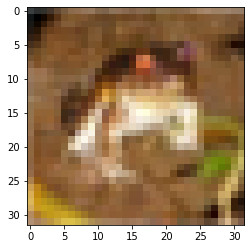

In [22]:
plotshow(0)

In [11]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [13]:
classes = ["Airplane","Automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

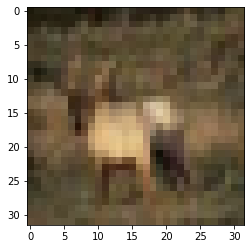

In [14]:
plotshow(3)

In [20]:
classes[y_train[3,0]]

'deer'

In [23]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [24]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')

In [25]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [41]:
y_train_categorical.shape

(50000, 10)

# Train and Predict

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 62s 39ms/step - loss: 1.9324 - accuracy: 0.3020
Epoch 2/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.6457 - accuracy: 0.4179
Epoch 3/50
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5553 - accuracy: 0.4477
Epoch 4/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4924 - accuracy: 0.4746
Epoch 5/50
1563/1563 [==============================] - 70s 45ms/step - loss: 1.4399 - accuracy: 0.4931
Epoch 6/50
1563/1563 [==============================] - 70s 45ms/step - loss: 1.3961 - accuracy: 0.5079
Epoch 7/50
1563/1563 [==============================] - 75s 48ms/step - loss: 1.3608 - accuracy: 0.5202
Epoch 8/50
1563/1563 [==============================] - 80s 51ms/step - loss: 1.3192 - accuracy: 0.5376
Epoch 9/50
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2781 - accuracy: 0.5544
Epoch 10/50
1563/1563 [==============================] - 85s 54m

In [35]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

'cat'

In [36]:
classes[y_test[0][0]]

'cat'

In [37]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 4s 11ms/step - loss: 1.6127 - accuracy: 0.5553


[1.6126827001571655, 0.5552999973297119]